In [1]:
import numpy as np 
import docx2txt
import matplotlib.pyplot as plt
import math
%matplotlib inline

# $Project \, 1A $
### $Markov \, model \, for \, natural \, Language$

**By Shinehale(yunsong Yang) (U202115980)**

before we code, we consider a way to calculate the entropy rate for the natural language, which is the fundamental part of the project. we have the assumptions as follow:

- the discrete source are stationary.
- the limit theory exists for m-th order source.
- the source is memoryless.
- the source is i.i.d

then we will have a basic function as follow.

$$
H(\chi) = - \sum_{ij} \mu_i P_{ij}logP_{ij}
$$

where the $\mu_i$ is the stationary distribution of the markov transmition matrix. consider the 1-th markov chain firstly, we can have the $P_{ij} = Pr\{X_{n + 1} = j | X_n = i\}$

before we dive into the specific problem, we should read the data from the target file, an d convert them to the form we are famaliar with.

In [2]:
data_en = docx2txt.process('../Steve_Jobs_Speech.docx')
data_ch = docx2txt.process('../Zhengfei_Ren_Email.docx')

data_en = data_en.lower()
data_en = data_en.replace('\n', '')
data_ch = data_ch.replace('\n', '')

print('the length of the Chinese file is: ', len(data_ch))
print('the length of the English file is: ', len(data_en))

the length of the Chinese file is:  4159
the length of the English file is:  11810


From the codes above, we can find the length of the file, and all the datas are converted into the string, by using `docx2txt` library. so let us focus on the english file first, we have a look at the $\text{0-th}$ markov chain model, and calculate the entropy. we can view the data as a random information source, and let the frequency of the character as the probability of the character, so we can have the distribution of the character, and then by using the equation as follow, we can have the entropy:

$$
H(\chi) = - \sum_{i}  P_{i}logP_{i}
$$

Let us dive into the code, and have a look at what is going on.

## $English \, document $


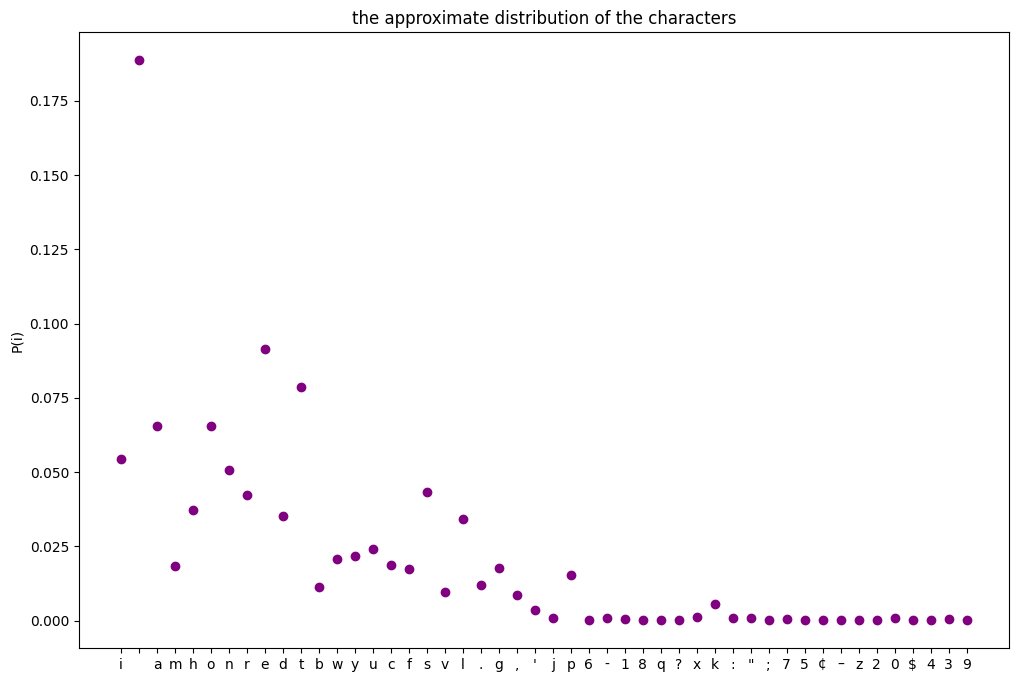

In [3]:
dict_en = dict()
for each in data_en:
    # if each in [';', '$', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', '?', "\"", "\'", '-', '¢']:
    #     continue
    if dict_en.get(each) == None:
        dict_en[each] = 1
    else:
        dict_en[each] += 1
vals_en = np.array(list(dict_en.values()))
keys_en = np.array(list(dict_en.keys()))
tot_chara = np.sum(vals_en)
P_en = vals_en / tot_chara
plt.figure(figsize=(12, 8))
plt.title('the approximate distribution of the characters')
plt.scatter(keys_en, P_en, color='purple')
plt.ylabel('P(i)')
plt.show()

In [4]:
H0_en = 0.0
for each in P_en:
    H0_en += - each * math.log2(each)
print('the entropy by using the 0-th markov chain model is %.4f bits'%(H0_en))

the entropy by using the 0-th markov chain model is 4.2395 bits


From the code above, we can find that by using the $\text{0-th}$ markov chain model, the entropy is $H_0(\chi) = 4.2395 \,bits$, wow, what a amazing outcome, but before we dive into the $\text{3-th}$ or $\text{5-th}$, we can have a general method for find the $\text{m-th}$, Given the $\text{m-th}$ order $\text{n-ary}$ Markov source.

- m is the number of related previous outcomes.
- n is the number of elements in sample space.
- State space $S = {e}, i= 1,2..... n$.
- Transition probability: $P_{ij} = p(e_j|e_i)$.
- Stationary probability: $\mu_{j} = p_{I \rightarrow \infty} (e_j)$
Then, the entropy rate is
$$
H(\chi) = H'(\chi) = H(X_{m+1}|X_m, X_{m -1}, \cdots, X_1) \\
= -\sum_{i=1}^{n^m}\sum_{j=1}^{n^m}p(e_i)p(e_j|e_i)logp(e_j|e_i) $$

Finally, we will have the standard equation:
$$
H(\chi)= - \sum_{ij} \mu_i P_{ij}logP_{ij}
$$
by using the general method, we can have a look on the $\text{3-th}$ case. we can define a method for checkout the position of the status

In [5]:
dicpos_en = dict()
en_size = keys_en.size
for i in range(en_size):
    dicpos_en[keys_en[i]] = i
def getpos_en(lis):
    rv = 0
    for each in lis:
        rv = rv * en_size + dicpos_en[each]
    return rv

In [6]:
lis3_en = list(data_en[0:3])
pos = 3
dict3_en = dict()
cnt = 0
while pos < len(data_en):
    if dict3_en.get(getpos_en(lis3_en)) == None:
        dict3_en[getpos_en(lis3_en)] = cnt
        cnt += 1
    lis3_en.pop(0)
    lis3_en.append(data_en[pos])
    pos += 1
if dict3_en.get(getpos_en(lis3_en)) == None:
        dict3_en[getpos_en(lis3_en)] = cnt
        cnt += 1
        
cnt3_en = cnt
mat3_en = np.zeros((cnt3_en, cnt3_en))
lis3_en = list(data_en[0:3])
pos = 3
while pos < len(data_en):
    pos1 = dict3_en[getpos_en(lis3_en)]
    lis3_en.pop(0)
    lis3_en.append(data_en[pos])
    pos2 = dict3_en[getpos_en(lis3_en)]
    pos += 1
    mat3_en[pos1][pos2] += 1 
mat3_en[dict3_en[getpos_en(lis3_en)]][dict3_en[getpos_en(list(data_en[0:3]))]] += 1
for i in range(cnt3_en):
    mat3_en[i] = mat3_en[i] / np.sum(mat3_en[i])
print(mat3_en.shape)

(2170, 2170)


From the outcome, we can find we have a $(2170 , 2170)$ matrix as the transmition matrix, which is really large. set it as the iterative matrix and iterate it over and over again, we will find it converges to a specific distribution, we call it stationary distribution, that is what we want.

In [7]:
times = 20
iter3_en = mat3_en
for i in range(times):
    iter3_en = iter3_en.dot(iter3_en)
    
station3_en = iter3_en[0]
print(station3_en)

[1.69376694e-04 4.23441734e-04 2.54065041e-04 ... 8.46883469e-05
 8.46883469e-05 8.46883469e-05]


After solving the stationary distribution calculation, we can finally solve the $\text{3-th}$ order entropy as we talk about above,

In [8]:
H3_en = 0
for i in range(cnt3_en):
    for j in range(cnt3_en):
        if mat3_en[i][j] == 0:
            continue
        H3_en = H3_en - station3_en[i] * mat3_en[i][j] * math.log2(mat3_en[i][j])
print('the entropy by using the 3-th markov chain model is %.4f bits' %H3_en)

the entropy by using the 3-th markov chain model is 1.4124 bits


Repeat what we do above but replace the status by using a five element queue, we can have the outcome under the $\text{5-th}$ order.

In [9]:
lis5_en = list(data_en[0:5])
pos = 5
dict5_en = dict()
cnt = 0
while pos < len(data_en):
    if dict5_en.get(getpos_en(lis5_en)) == None:
        dict5_en[getpos_en(lis5_en)] = cnt
        cnt += 1
    lis5_en.pop(0)
    lis5_en.append(data_en[pos])
    pos += 1
if dict5_en.get(getpos_en(lis5_en)) == None:
        dict5_en[getpos_en(lis5_en)] = cnt
        cnt += 1
cnt5_en = cnt
mat5_en = np.zeros((cnt5_en, cnt5_en))
lis5_en = list(data_en[0:5])
pos = 5
while pos < len(data_en):
    pos1 = dict5_en[getpos_en(lis5_en)]
    lis5_en.pop(0)
    lis5_en.append(data_en[pos])
    pos2 = dict5_en[getpos_en(lis5_en)]
    pos += 1
    mat5_en[pos1][pos2] += 1 
mat5_en[dict5_en[getpos_en(lis5_en)]][dict5_en[getpos_en(list(data_en[0:5]))]] += 1
for i in range(cnt5_en):
    mat5_en[i] = mat5_en[i] / np.sum(mat5_en[i])

In [10]:
times = 20
iter5_en = mat5_en
for i in range(times):
    iter5_en = iter5_en.dot(iter5_en)
    
station5_en = iter5_en[0]
print(station5_en)

[1.69405387e-04 8.47026935e-05 8.47026935e-05 ... 8.47026935e-05
 8.47026935e-05 8.47026935e-05]


In [11]:
H5_en = 0
for i in range(cnt5_en):
    for j in range(cnt5_en):
        if mat5_en[i][j] == 0:
            continue
        H5_en = H5_en - station5_en[i] * mat5_en[i][j] * math.log2(mat5_en[i][j])
print('the entropy by using the 5-th markov chain model is %.4f bits' %H5_en)

the entropy by using the 5-th markov chain model is 0.5080 bits


What a amazing outcome, I think we should have a comment on it comparing to what we learn in the class. as we all know,  with the $n$ increases, the entropy will decreases to a limit, when $n \rightarrow \infty$, the entropy converges to $1.4 \text{bits/signal}$, but what we calculate is lower than the standard answer. after checking what I code over and over again, I think there is no wrong in the way I code, but for it is a specific docement. what it means is when we focus on a specific document, but do not have too much samples, the uncertainty will not as the same as the standard outcome, for standard has trained a large amout of samples, much greater than those covered by this document, a easy way to confirm what I talk is just put some other words into the document, and we can find that no matter what kind of entropy is, the value will going on.

Ok, so let we consider the chinese document as follow:

## $Chinese \, document$
As what we have done on the english document, we can repeat the processes again, and we can have what we wanna.

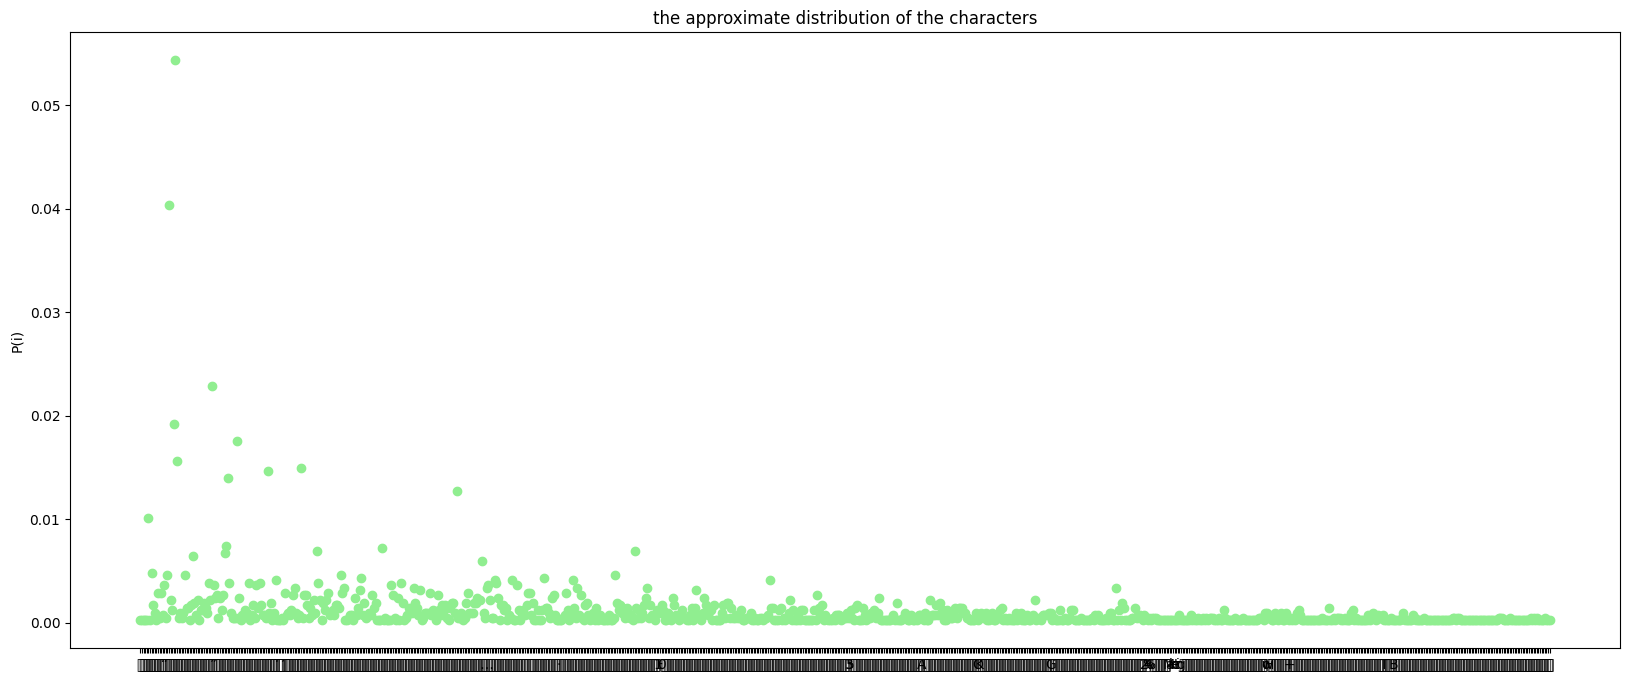

In [18]:
dict_ch = dict()
for each in data_ch:
    if dict_ch.get(each) == None:
        dict_ch[each] = 1
    else:
        dict_ch[each] += 1
vals_ch = np.array(list(dict_ch.values()))
keys_ch = np.array(list(dict_ch.keys()))
tot_chara = np.sum(vals_ch)
P_ch = vals_ch / tot_chara
plt.figure(figsize=(20, 8))
plt.title('the approximate distribution of the characters')
plt.scatter(keys_ch, P_ch, color='lightgreen')
plt.ylabel('P(i)')
plt.show()

In [13]:
H0_ch = 0.0
for each in P_ch:
    H0_ch += - each * math.log2(each)
print('the entropy by using the 0-th markov chain model is %.4f bits'%(H0_ch))

the entropy by using the 0-th markov chain model is 8.5048 bits


from the code above, we can know that the entropy of the Chinese is $8.5048 bits$

In [14]:
dicpos_ch = dict()
ch_size = keys_ch.size
for i in range(ch_size):
    dicpos_ch[keys_ch[i]] = i
def getpos_ch(lis):
    rv = 0
    for each in lis:
        rv = rv * ch_size + dicpos_ch[each]
    return rv

lis3_ch = list(data_ch[0:3])
pos = 3
dict3_ch = dict()
cnt = 0
while pos < len(data_ch):
    if dict3_ch.get(getpos_ch(lis3_ch)) == None:
        dict3_ch[getpos_ch(lis3_ch)] = cnt
        cnt += 1
    lis3_ch.pop(0)
    lis3_ch.append(data_ch[pos])
    pos += 1
if dict3_ch.get(getpos_ch(lis3_ch)) == None:
        dict3_ch[getpos_ch(lis3_ch)] = cnt
        cnt += 1
cnt3_ch = cnt
mat3_ch = np.zeros((cnt3_ch, cnt3_ch))
lis3_ch = list(data_ch[0:3])
pos = 3
while pos < len(data_ch):
    pos1 = dict3_ch[getpos_ch(lis3_ch)]
    lis3_ch.pop(0)
    lis3_ch.append(data_ch[pos])
    pos2 = dict3_ch[getpos_ch(lis3_ch)]
    pos += 1
    mat3_ch[pos1][pos2] += 1 
mat3_ch[dict3_ch[getpos_ch(lis3_ch)]][dict3_ch[getpos_ch(list(data_ch[0:3]))]] += 1
for i in range(cnt3_ch):
    mat3_ch[i] = mat3_ch[i] / np.sum(mat3_ch[i])
print(mat3_ch.shape)

(3809, 3809)


In [15]:
times = 20
iter3_ch = mat3_ch
for i in range(times):
    iter3_ch = iter3_ch.dot(iter3_ch)
    
station3_ch = iter3_ch[0]
print(station3_ch)

[0.00024056 0.00024056 0.00024056 ... 0.00024056 0.00024056 0.00024056]


In [16]:
H3_ch = 0
for i in range(cnt3_ch):
    for j in range(cnt3_ch):
        if mat3_ch[i][j] == 0:
            continue
        H3_ch = H3_ch - station3_ch[i] * mat3_ch[i][j] * math.log2(mat3_ch[i][j])
print('the entropy by using the 3-th markov chain model is %.4f bits' %H3_ch)

the entropy by using the 3-th markov chain model is 0.1487 bits


In [17]:
lis5_ch = list(data_ch[0:5])
pos = 5
dict5_ch = {}
cnt = 0
while pos < len(data_ch):
    if dict5_ch.get(getpos_ch(lis5_ch)) is None:
        dict5_ch[getpos_ch(lis5_ch)] = cnt
        cnt += 1
    lis5_ch.pop(0)
    lis5_ch.append(data_ch[pos])
    pos += 1

if dict5_ch.get(getpos_ch(lis5_ch)) is None:
    dict5_ch[getpos_ch(lis5_ch)] = cnt
    cnt += 1

cnt5_ch = cnt
mat5_ch = np.zeros((cnt5_ch, cnt5_ch))
lis5_ch = list(data_ch[0:5])
pos = 5
while pos < len(data_ch):
    pos1 = dict5_ch[getpos_ch(lis5_ch)]
    lis5_ch.pop(0)
    lis5_ch.append(data_ch[pos])
    pos2 = dict5_ch[getpos_ch(lis5_ch)]
    pos += 1
    mat5_ch[pos1][pos2] += 1

mat5_ch[dict5_ch[getpos_ch(lis5_ch)]][dict5_ch[getpos_ch(list(data_ch[0:5]))]] += 1

for i in range(cnt5_ch):
    mat5_ch[i] = mat5_ch[i] / np.sum(mat5_ch[i])

times = 20
iter5_ch = mat5_ch
for i in range(times):
    iter5_ch = iter5_ch.dot(iter5_ch)

station5_ch = iter5_ch[0]
H5_ch = 0
for i in range(cnt5_ch):
    for j in range(cnt5_ch):
        if mat5_ch[i][j] == 0:
            continue
        H5_ch = H5_ch - station5_ch[i] * mat5_ch[i][j] * math.log2(mat5_ch[i][j])

print('The entropy by using the 5th-order Markov chain model is %.4f bits' % H5_ch)


The entropy by using the 5th-order Markov chain model is 0.0121 bits


## $Summary$

Absolutely amazing, for the specific document, the entropy of the English and Chinese, the Chinese has a lower mc entropy than English, reconsider the calculation of the mc entropy, it reflects the uncertainty of the case of the next step given the known status, in other word, because of the entropy of Chinese language is larger, when the document is confiemed, the uncertainty is lower. 